<a href="https://colab.research.google.com/github/Mayakshanesht/Autonomous_Driving_Lecture_resources/blob/Perception/Traffic_sign_classification_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries require for traffic sign classification problem
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import keras
from glob import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#load dataset
!unzip "/content/drive/My Drive/Traffic sign classification GTSRB/archive.zip" -d "/content/drive/My Drive/Traffic sign classification GTSRB/Data/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/Traffic sign classification GTSRB/Data/train/5/00005_00053_00010.png  
  inflating: /content/drive/My Drive/Traffic sign classification GTSRB/Data/train/5/00005_00053_00011.png  
  inflating: /content/drive/My Drive/Traffic sign classification GTSRB/Data/train/5/00005_00053_00012.png  
  inflating: /content/drive/My Drive/Traffic sign classification GTSRB/Data/train/5/00005_00053_00013.png  
  inflating: /content/drive/My Drive/Traffic sign classification GTSRB/Data/train/5/00005_00053_00014.png  
  inflating: /content/drive/My Drive/Traffic sign classification GTSRB/Data/train/5/00005_00053_00015.png  
  inflating: /content/drive/My Drive/Traffic sign classification GTSRB/Data/train/5/00005_00053_00016.png  
  inflating: /content/drive/My Drive/Traffic sign classification GTSRB/Data/train/5/00005_00053_00017.png  
  inflating: /content/drive/My Drive/Traffic sign classification GTSRB/Data/train/5/0

In [4]:
#Use Image Generators
#1. Initialize
#For Training Data
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255.,
                                                                  rotation_range=30,
                                                              
                                                                  zoom_range=0.2,
                                                                  horizontal_flip=True,
                                                                  
                                                                  fill_mode='nearest',
                                                                  preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

#For Validation Data
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255., preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [5]:
#Pass set of images to the generator to generate compatible images for CNN
trainImageData = train_generator.flow_from_directory("/content/drive/My Drive/Traffic sign classification GTSRB/Data/Train/",
                                                     batch_size=32,
                                                     class_mode='categorical',
                                                     target_size=(32,32))



Found 39209 images belonging to 43 classes.


In [6]:
Test_Data=pd.read_csv("/content/drive/My Drive/Traffic sign classification GTSRB/Data/Test.csv")

In [7]:
Test_Data.head

<bound method NDFrame.head of        Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0         53      54       6       5      48      49       16  Test/00000.png
1         42      45       5       5      36      40        1  Test/00001.png
2         48      52       6       6      43      47       38  Test/00002.png
3         27      29       5       5      22      24       33  Test/00003.png
4         60      57       5       5      55      52       11  Test/00004.png
...      ...     ...     ...     ...     ...     ...      ...             ...
12625     42      41       5       6      37      36       12  Test/12625.png
12626     50      51       6       5      45      46       33  Test/12626.png
12627     29      29       6       6      24      24        6  Test/12627.png
12628     48      49       5       6      43      44        7  Test/12628.png
12629     32      31       6       5      27      26       10  Test/12629.png

[12630 rows x 8 columns]>

In [8]:
Test_labels=Test_Data['ClassId'].values
from sklearn.preprocessing import LabelBinarizer
Label_binarizer=LabelBinarizer()
Test_labels_transfromed=Label_binarizer.fit_transform(Test_labels)
print(Test_labels_transfromed)
len(Test_labels_transfromed)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


12630

In [21]:
valid_path = "/content/drive/My Drive/Traffic sign classification GTSRB/Data/Test/"
#Test_images=np.load("/content/drive/My Drive/Traffic sign classification GTSRB/Data/Test/")
#Test_images = glob(valid_path + '/*/*.png')
#Test_images4=Test_Data['Path'].values
Test_images2 = glob(valid_path + '/*.png')
Test_images3=[]
import cv2
for image in Test_images2:
  #img=cv2.imread(image)
  img=tf.keras.preprocessing.image.load_img(image, target_size=(32,32))
  imgArray=tf.keras.preprocessing.image.img_to_array(img)
  #img2=np.expand_dims(imgArray,axis=0)
  
  #img2=cv2.resize(imgArray,dsize=(32,32))
  
  Test_images3.append(np.array(imgArray))



len(Test_images3)

#plt.imshow(Test_images3[0])

12630

In [10]:
# Follow the following order when planning to use Transfer Learning with existing CNN architectures
# 1. VGG16
# 2. Inceptionv3
# 3. Resnet50
# 4. Xception
# 5. Nasnet --
# Only applicable if you are not planning to train entire model

In [11]:
vgg = tf.keras.applications.vgg16.VGG16(input_shape=[32,32,3],
                                        weights="imagenet",
                                        include_top=False)


#To use the existing weights and disable training on VGG object.
# Ensure all weights are immutable

for layer in vgg.layers:
  layer.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [12]:
#Create our FC layer as per our spec
#Flatten
flatten = tf.keras.layers.Flatten()
#FC layer
finalLayer = tf.keras.layers.Dense(43,activation="softmax")

In [13]:
model=tf.keras.models.Sequential([vgg,flatten,finalLayer])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 43)                22059     
Total params: 14,736,747
Trainable params: 22,059
Non-trainable params: 14,714,688
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',
            
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
batch_size=128
history = model.fit(trainImageData,epochs=50)

Epoch 1/50
1226/1226 [==============================] - 136s 86ms/step - loss: 2.6161 - accuracy: 0.2911
Epoch 2/50
1226/1226 [==============================] - 104s 85ms/step - loss: 1.7469 - accuracy: 0.4909
Epoch 3/50
1226/1226 [==============================] - 105s 86ms/step - loss: 1.5440 - accuracy: 0.5460
Epoch 4/50
1226/1226 [==============================] - 104s 85ms/step - loss: 1.4204 - accuracy: 0.5791
Epoch 5/50
1226/1226 [==============================] - 107s 87ms/step - loss: 1.3507 - accuracy: 0.5947
Epoch 6/50
1226/1226 [==============================] - 106s 86ms/step - loss: 1.2923 - accuracy: 0.6081
Epoch 7/50
1226/1226 [==============================] - 106s 86ms/step - loss: 1.2333 - accuracy: 0.6247
Epoch 8/50
1226/1226 [==============================] - 106s 87ms/step - loss: 1.2020 - accuracy: 0.6343
Epoch 9/50
1226/1226 [==============================] - 106s 86ms/step - loss: 1.1778 - accuracy: 0.6437
Epoch 10/50
1226/1226 [==============================] 

In [16]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model.h5') 

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.7383074e-11, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 2.4891093e-25, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 3.3340816e-22, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00]], dtype=float32)

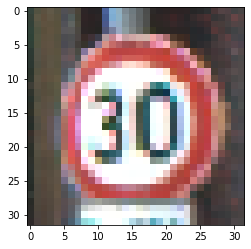

In [19]:
#deployement
img=tf.keras.preprocessing.image.load_img("/content/drive/My Drive/Traffic sign classification GTSRB/Data/Test/00001.png", target_size=(32,32))
imgArray=tf.keras.preprocessing.image.img_to_array(img)
#import numpy as np
img2=np.expand_dims(imgArray,axis=0)
import matplotlib.pyplot as plt
plt.imshow(img)
model.predict(img2)